In [1]:
import numpy as np
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage import io, color, transform

import cv2
import numpy as np
import os
import pandas as pd
import re

from PIL import Image
from sklearn.preprocessing import MinMaxScaler

# READ DATA

In [2]:
data = pd.read_csv("dataset.csv")

# CHECK CLASS IMBALANCE

In [3]:
class_counts = data['label'].value_counts()
print(class_counts)

label
3    5126
2    5042
0    3218
1    3176
4    3090
Name: count, dtype: int64


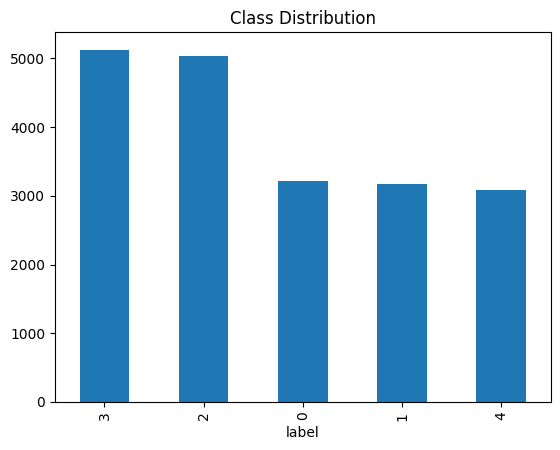

In [4]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ cân bằng lớp
class_counts.plot(kind='bar', title='Class Distribution')
plt.show()


In [5]:
total_samples = len(data)
class_ratios = class_counts / total_samples
print(class_ratios)


label
3    0.260839
2    0.256564
0    0.163749
1    0.161612
4    0.157236
Name: count, dtype: float64


# SPLIT DATA

In [6]:
x = data.drop("label", axis=1)
y = data['label']

In [7]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values

In [8]:
# Kiểm tra dữ liệu
X_train[0]

array([ 15,  14,  13, ..., 193, 192, 175], dtype=int64)

In [9]:
X_train[0].shape

(2304,)

# SCALE DATA

In [10]:
# Khởi tạo mô hình MinMaxScaler và fit trên tập huấn luyện
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Sử dụng mô hình đã fit để chuẩn hóa tập kiểm tra
X_test_scaled = scaler.transform(X_test)

# TRAIN

In [11]:
from sklearn.svm import SVC
# Huấn luyện mô hình SVM với các tham số cụ thể
svm_model = SVC(C=0.1, gamma=0.1, kernel='linear', probability=True)
svm_model.fit(X_train_scaled, y_train)

# Dự đoán nhãn trên tập kiểm tra
y_pred = svm_model.predict(X_test_scaled)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6777476255088195


# EVALUATE

In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Tính precision, recall, và f1-score cho từng lớp
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

class_names = ['Angry', 'Fear', 'Happy', 'Neutral', 'Sad']

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}\n')

for i in range(len(class_names)):
    print(f"Class {class_names[i]}:")
    print(f"  Precision: {precision[i]:.4f}")
    print(f"  Recall: {recall[i]:.4f}")
    print(f"  F1-Score: {f1[i]:.4f}")
    print()
    
# print onverall precision, recall, f1-score for each class
print(f"Overall:")
print(f"  Precision: {precision.mean():.4f}")
print(f"  Recall: {recall.mean():.4f}")
print(f"  F1-Score: {f1.mean():.4f}")

Accuracy: 0.6777476255088195

Class Angry:
  Precision: 0.5039
  Recall: 0.5505
  F1-Score: 0.5262

Class Fear:
  Precision: 0.5122
  Recall: 0.4778
  F1-Score: 0.4944

Class Happy:
  Precision: 0.8658
  Recall: 0.8527
  F1-Score: 0.8592

Class Neutral:
  Precision: 0.8508
  Recall: 0.8441
  F1-Score: 0.8474

Class Sad:
  Precision: 0.4457
  Recall: 0.4520
  F1-Score: 0.4488

Overall:
  Precision: 0.6357
  Recall: 0.6354
  F1-Score: 0.6352


# SAVE MODEL

In [13]:
import pickle

with open('svm_model_with_hog.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

In [14]:
from joblib import dump
dump(svm_model, 'svm_model_with_hog.h5')

['svm_model_without_hog.h5']

: 

# Tune

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Thiết lập các giá trị thử nghiệm cho C, kernel và gamma
param_grid = {'C': [0.1, 1, 10, 100, 10000],
              'kernel': ['linear', 'rbf'],
              'gamma': [0.1, 0.5, 5, 50]}

# Tạo mô hình SVM
svm_model = SVC()

# Sử dụng GridSearchCV để tìm kiếm qua lưới tham số
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# In ra tham số tốt nhất
print("Best Parameters:", grid_search.best_params_)

# Đánh giá mô hình trên tập kiểm tra
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")